# Part A

### Nikita Jagtiani

Answers for each question are written in a markdown cell below the code and analysis for it.  Questions 1-5 are fully done in Python here.
Excel versions of the questions are in the separate excel document.  The excel spreadsheet has sheets on the bottom organized based on the question number.  Questions 1-5 as well as 6 are all fully done there.

In [206]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 

In [207]:
import os

In [208]:
print(os.getcwd())

/Users/nikita


In [209]:
pwd

'/Users/nikita'

In [210]:
#reading in file for Median Household Incomes
data1 = pd.read_csv("Documents/Datasets/Median_Household_Incomes.csv")
data1.head()

,DATE,Median_CA,Median_CO,Median_NY,Median_TX,Median_IN
0,1/1/84,25287,59558,45671,53148,52561
1,1/1/85,26981,62895,47632,52988,50605
2,1/1/86,29010,59642,50116,52996,49851
3,1/1/87,30146,56140,51927,52419,47750
4,1/1/88,30287,53647,51993,51086,53808


In [211]:
#reading in file for Car Deatils
data2 = pd.read_csv("Documents/Datasets/Car_Detail.csv")
data2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [212]:
#checking size of the data (number of rows and columns)
data2.shape

(11199, 16)

In [213]:
#checking for any duplicates in the data across all rows
data2.duplicated().sum() 

0

In [214]:
#all duplicates are dropped
data2new = data2.drop_duplicates()
data2new.shape

(11199, 16)

In [215]:
#data is resaved
data2new.to_csv('Documents/Datasets/Car_Detail.csv', index=False)

In [216]:
#print out new data
data2new = pd.read_csv("Documents/Datasets/Car_Detail.csv")
data2new

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11195,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11196,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11197,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## Question 1 Code Below:

In [217]:
#QUESTION 1
pd.crosstab(data2new.Make,data2new.Driven_Wheels)
maxQ1 = pd.crosstab(data2new.Make,data2new.Driven_Wheels)
maxQ1.style.highlight_max()

Driven_Wheels,all wheel drive,four wheel drive,front wheel drive,rear wheel drive
Make,,,,
Acura,66,4,172,4
Alfa Romeo,0,0,0,5
Aston Martin,0,0,0,91
Audi,254,0,67,0
BMW,139,0,1,184
Bentley,48,0,0,26
Bugatti,3,0,0,0
Buick,47,0,132,11
Cadillac,122,36,67,171


In [218]:
#find the id (type of car) that has the highest count for each wheel type
maxQ1.idxmax()

Driven_Wheels
all wheel drive            Audi
four wheel drive      Chevrolet
front wheel drive    Volkswagen
rear wheel drive      Chevrolet
dtype: object

## QUESTION 1:
 #### --In the chart above the total number of cars with all wheel drive in visible and is broken down by each Make (the first column of data). 
 #### --The last column shows the rear wheel drive broken down by each Make. 
 #### --Cheverlot contains the most cars with rear wheel drive, at a high of 412 cars (highlighted in yellow).

#### -----------------------------------------------------------


## Question 2 Code Below:

In [219]:
#QUESTION 2
#narrow data to only show cars made in 2014 that have either automatic or manual transmission
mask2 = data2new[(data2new['Year'] == 2014) & ((data2new['Transmission Type'] == 'AUTOMATIC') | (data2new['Transmission Type'] =='MANUAL'))]
mask2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
111,Mazda,2,2014,regular unleaded,100.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,34,28,586,17050
112,Mazda,2,2014,regular unleaded,100.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,34,28,586,15560
113,Mazda,2,2014,regular unleaded,100.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,29,586,16210
114,Mazda,2,2014,regular unleaded,100.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,29,586,14720
460,Toyota,4Runner,2014,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Midsize,4dr SUV,23,17,2031,41365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11085,Subaru,XV Crosstrek,2014,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,33,25,640,22995
11086,Subaru,XV Crosstrek,2014,regular unleaded,148.0,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,33,25,640,24495
11087,Subaru,XV Crosstrek,2014,regular unleaded,148.0,4.0,MANUAL,all wheel drive,4.0,Crossover,Compact,4dr SUV,30,23,640,21995
11179,BMW,Z4,2014,premium unleaded (required),240.0,4.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,34,22,3916,48950


In [220]:
#crosstable displaying the amount of cars that are automatic or manual, respectively, for each transmission type
#all cars are 2014 models
Q2 = pd.crosstab([mask2['Year'],mask2['Market Category']], [mask2['Transmission Type']])
Q2

Transmission Type                                        AUTOMATIC  MANUAL
Year Market Category                                                      
2014 Crossover                                                  30       2
     Crossover,Factory Tuner,Luxury,High-Performance             2       0
     Crossover,Flex Fuel                                         4       0
     Crossover,Hatchback                                         8       0
     Crossover,Hybrid                                            4       0
     Crossover,Luxury                                           21       0
     Crossover,Luxury,Diesel                                     6       0
     Crossover,Luxury,Performance                                3       0
     Crossover,Performance                                       8       0
     Diesel                                                      0       5
     Exotic,Factory Tuner,High-Performance                       0       2
     Exotic,Factory Tuner,Luxury,High-Performance                4       0
     Exotic,Flex Fuel,Factory Tuner,Luxury,High-Perf...          2       0
     Exotic,Flex Fuel,Luxury,High-Performance                    3       0
     Exotic,High-Performance                                     5      14
     Exotic,Luxury,High-Performance                              7       0
     Exotic,Luxury,Performance                                   6       0
     Factory Tuner,High-Performance                              0       4
     Factory Tuner,Luxury,High-Performance                      10       6
     Factory Tuner,Luxury,Performance                            1       0
     Factory Tuner,Performance                                   0       1
     Flex Fuel                                                  58       0
     Flex Fuel,Luxury                                            2       0
     Flex Fuel,Luxury,High-Performance                           8       0
     Flex Fuel,Luxury,Performance                                2       0
     Flex Fuel,Performance                                       2       0
     Hatchback                                                  14      11
     Hatchback,Factory Tuner,High-Performance                    0       1
     Hatchback,Hybrid                                           11       3
     Hatchback,Performance                                       1       7
     High-Performance                                            3       6
     Hybrid                                                      6       0
     Luxury                                                     24       2
     Luxury,High-Performance                                    13      11
     Luxury,High-Performance,Hybrid                              1       0
     Luxury,Hybrid                                               3       0
     Luxury,Performance                                         32       3
     Luxury,Performance,Hybrid                                   3       0
     Performance                                                13      19

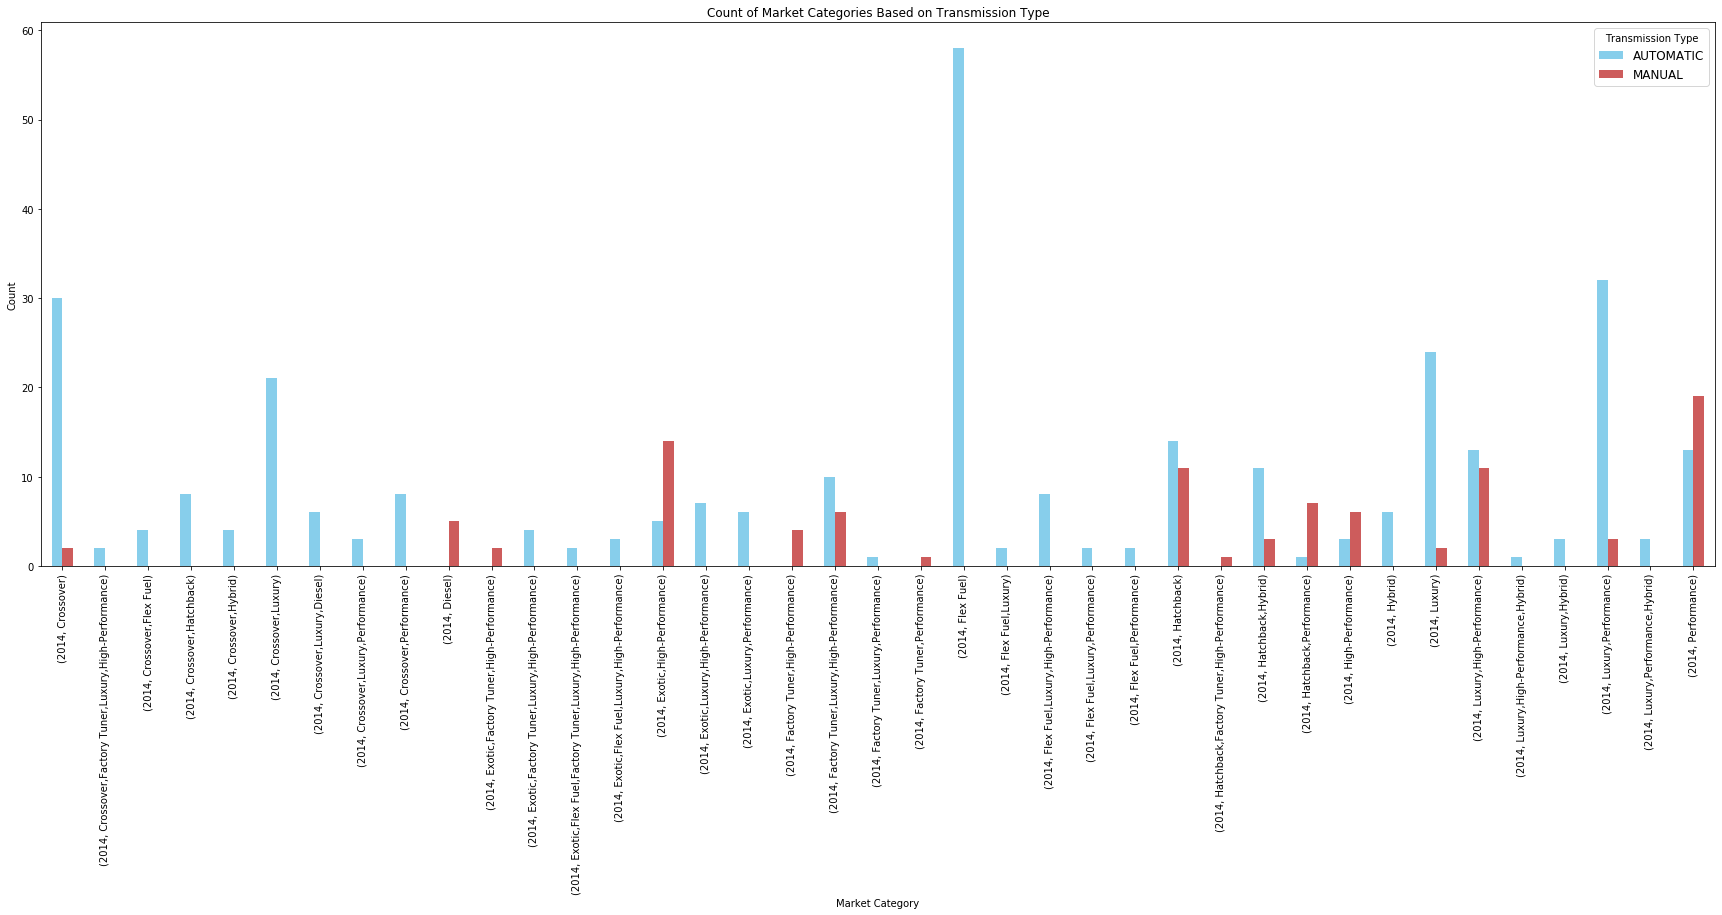

In [221]:
#plot the data in the form of a double bar graph
Q2graph = Q2.plot.bar(color=["SkyBlue","IndianRed"], rot=90, title="Count of Market Categories Based on Transmission Type")
Q2graph.set_xlabel("Market Category")
Q2graph.set_ylabel("Count")
plt.rcParams['figure.figsize']= [12.0, 8.0]
plt.show()

## QUESTION 2:
 #### --In the graph above the amount of cars that fall under each Market Category is displayed for 2014.  The Automatic cars are displayed in blue and the Manual cars are displayed in red.  Some of the Market Categories did not have any Manual cars so there are breaks in the data.  The values are also displayed in the crosstable.

#### -----------------------------------------------------------


## Question 3 Code Below:

In [222]:
#QUESTION 3
#table with just highwayMPG and the associated MSRP
mask3 = data2new[['highway MPG', 'MSRP']] 
mask3

,highway MPG,MSRP
0,26,46135
1,28,40650
2,28,36350
3,28,29450
4,28,34500
...,...,...
11194,23,46120
11195,23,56670
11196,23,50620
11197,23,50920


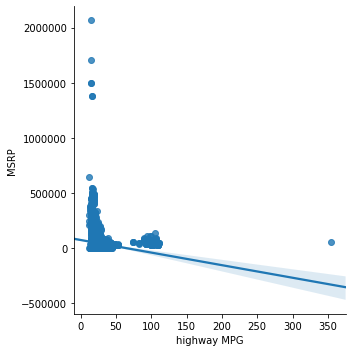

In [223]:
#scatter plot displaying highway MPG vs. MSRP
#regression line is plotted on graph based on the data point
Q3plot = sns.lmplot(x='highway MPG',y='MSRP', data=mask3,fit_reg=True) 

In [224]:
#chart displaying regression statistics
X3 = mask3['highway MPG']
Y3 = mask3['MSRP']
X3 = sm.add_constant(X3)
dataQ3 = sm.OLS(Y3, X3)
resultsQ3 = dataQ3.fit()
print(resultsQ3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     319.8
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           1.55e-70
Time:                        23:59:15   Log-Likelihood:            -1.3923e+05
No. Observations:               11199   AIC:                         2.785e+05
Df Residuals:                   11197   BIC:                         2.785e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.232e+04   1793.720     40.318      

/Users/nikita/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## QUESTION 3:
 #### --The R-squared value is .028 meaning that 2% of MSRP values can be predicted by highway MPG.  This shows that highway MPG and MSRP are not significantly correlated and the minimal .028 is most likely due to chance.
 #### --The regression coefficient (labeled as coef) shows the change in the dependent variable (MSRP) from a one unit change in the independent variable (highway MPG).  In this case it is -1142.1349.  Because it is negative it shows that as highway MPG increases, the MSRP decreases.
 #### --The standard error is 63.870 is very high meaning that the coefficient is not very accurate.  This may be the case because there are many evident outliers in the data. 
 #### --The p-value explains that a 1142.13 decrease in highway MPG due to a one unit increase in MSRP is 0%.  We are assuming there is no relationship between the two variables.  The p-value is less than .05 so the results are statistically significant.
 #### --The confidence interval is (-1267.33, -1016.94).  Therefore we can be 95% confident that the coefficient will fall between those two values. 
 
#### -----------------------------------------------------------


## Question 4 Code Below:

In [225]:
#QUESTION 4
#HOUSING INCOME ORIGINAL DATA
data1.head()

,DATE,Median_CA,Median_CO,Median_NY,Median_TX,Median_IN
0,1/1/84,25287,59558,45671,53148,52561
1,1/1/85,26981,62895,47632,52988,50605
2,1/1/86,29010,59642,50116,52996,49851
3,1/1/87,30146,56140,51927,52419,47750
4,1/1/88,30287,53647,51993,51086,53808


In [226]:

#creating a new chart to calulate the change in income by year for ech state, repectively
#the difference was taken for the current year and the previous year, so the first row for each column is filled with NA
mask4 = data1
mask4['Diff_Median_CA'] = mask4['Median_CA'].diff()
mask4['Diff_Median_CO'] = mask4['Median_CO'].diff()
mask4['Diff_Median_NY'] = mask4['Median_NY'].diff()
mask4['Diff_Median_TX'] = mask4['Median_TX'].diff()
mask4['Diff_Median_IN'] = mask4['Median_IN'].diff()
Q4data = mask4[['DATE', 'Diff_Median_CA','Diff_Median_CO','Diff_Median_NY', 'Diff_Median_TX', 'Diff_Median_IN']]
data1 = data1[['DATE', 'Median_CA','Median_CO','Median_NY', 'Median_TX', 'Median_IN']]

Q4data.style.highlight_min()

,DATE,Diff_Median_CA,Diff_Median_CO,Diff_Median_NY,Diff_Median_TX,Diff_Median_IN
0,1/1/84,nan,nan,nan,nan,nan
1,1/1/85,1694,3337,1961,-160,-1956
2,1/1/86,2029,-3253,2484,8,-754
3,1/1/87,1136,-3502,1811,-577,-2101
4,1/1/88,141,-2493,66,-1333,6058
5,1/1/89,2722,-1087,-846,-330,-3028
6,1/1/90,281,4868,-1283,1991,-462
7,1/1/91,374,-635,-728,-2744,-1476
8,1/1/92,1239,355,-1022,-826,1350
9,1/1/93,-830,2034,878,119,387


In [227]:
#Finding the minimum for each state
Q4data.min(axis=None, skipna=True, numeric_only=True)

Diff_Median_CA   -1851.0
Diff_Median_CO   -8623.0
Diff_Median_NY   -5035.0
Diff_Median_TX   -2744.0
Diff_Median_IN   -3752.0
dtype: float64

In [228]:
#Determining Year for the absolute lowest value
abslow = (Q4data[Q4data.Diff_Median_CO == Q4data.Diff_Median_CO.min()]) 
abslow

,DATE,Diff_Median_CA,Diff_Median_CO,Diff_Median_NY,Diff_Median_TX,Diff_Median_IN
30,1/1/14,-307.0,-8623.0,-3412.0,1698.0,-2370.0


## QUESTION 4:
 #### --The minimum increase in one year for each state is shown.  Colorado had the lowest increase in income in 1 year.  This occured from 1/1/2013 to 1/1/2014.  The Median income during this timeframe decreased by 8,623 dollars.
 
#### -----------------------------------------------------------


## Question 5 Code Below:

In [229]:
#QUESTION 5
#limit data so only the date and median incomes for NY and TX are visible
Q5T1 = data1[['DATE', 'Median_NY', 'Median_TX']]
Q5T1

,DATE,Median_NY,Median_TX
0,1/1/84,45671,53148
1,1/1/85,47632,52988
2,1/1/86,50116,52996
3,1/1/87,51927,52419
4,1/1/88,51993,51086
5,1/1/89,51147,50756
6,1/1/90,49864,52747
7,1/1/91,49136,50003
8,1/1/92,48114,49177
9,1/1/93,48992,49296


In [230]:
#table containing the year and the respective median MSRP value
#add additonal index so it will match the other data table
Q5T2 = pd.pivot_table(data2new,index =['Year'], values=['MSRP'],aggfunc='median')
Q5T2.reset_index(inplace=True)
Q5T2['Year'] = Q5T2['Year'].astype(str)
Q5T2.rename(columns={'MSRP':'Median_MSRP'},inplace=True)
Q5T2

,Year,Median_MSRP
0,1990,2000.0
1,1991,2000.0
2,1992,2000.0
3,1993,2000.0
4,1994,2000.0
5,1995,2000.0
6,1996,2000.0
7,1997,2242.0
8,1998,2713.0
9,1999,2855.0


In [231]:
#the car data is only available from 1990-2017 so drop unwated rows in the house income data
#reset index after dropping rows
Q5T3 = Q5T1.drop(Q5T1.index[0:6])
Q5T3 = Q5T3.drop(Q5T3.index[28])
Q5T3 = Q5T3.reset_index()
del Q5T3['index']
Q5T3

,DATE,Median_NY,Median_TX
0,1/1/90,49864,52747
1,1/1/91,49136,50003
2,1/1/92,48114,49177
3,1/1/93,48992,49296
4,1/1/94,49241,51696
5,1/1/95,48822,52588
6,1/1/96,48989,52875
7,1/1/97,50791,54891
8,1/1/98,53901,55251
9,1/1/99,54171,58491


In [232]:
#concatinate the two tables together so all the desired data is in one chart
Q5house = pd.DataFrame(Q5T3, columns = ['Median_NY', 'Median_TX'])
Q5car = pd.DataFrame(Q5T2, columns = ['Year', 'Median_MSRP'])
Q5T4 = pd.concat([Q5car,Q5house], axis=1)
Q5T4

,Year,Median_MSRP,Median_NY,Median_TX
0,1990,2000.0,49864,52747
1,1991,2000.0,49136,50003
2,1992,2000.0,48114,49177
3,1993,2000.0,48992,49296
4,1994,2000.0,49241,51696
5,1995,2000.0,48822,52588
6,1996,2000.0,48989,52875
7,1997,2242.0,50791,54891
8,1998,2713.0,53901,55251
9,1999,2855.0,54171,58491


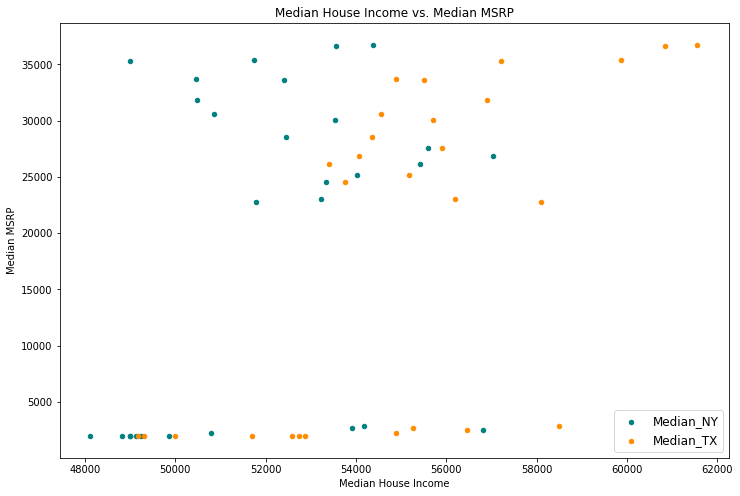

In [233]:
#scatter plot for Median House Income vs. Median MSRP
#x and y values are correlated by year
ax = Q5T4.plot(kind='scatter', x='Median_NY', y='Median_MSRP', color='Teal', label='Median_NY')
Q5plot = Q5T4.plot(kind='scatter', x='Median_TX', y='Median_MSRP', color='DarkOrange', label='Median_TX',ax=ax)
ax.set_xlabel("Median House Income")
ax.set_ylabel("Median MSRP")
ax.set_title("Median House Income vs. Median MSRP")
Q5plot

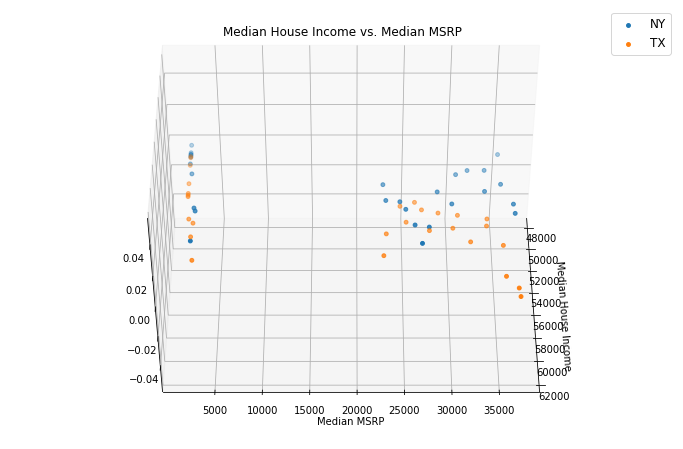

In [234]:
#3D plot of the data
mpl.rcParams['legend.fontsize'] = 12
  
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(Q5T4['Median_NY'], Q5T4['Median_MSRP'], label ='NY', s = 15) 
ax.scatter(Q5T4['Median_TX'], Q5T4['Median_MSRP'], label ='TX', s = 15) 
ax.legend() 
ax.set_xlabel("Median House Income")
ax.set_ylabel("Median MSRP")
ax.set_title("Median House Income vs. Median MSRP")
ax.view_init(45, 0) 
  
plt.show() 

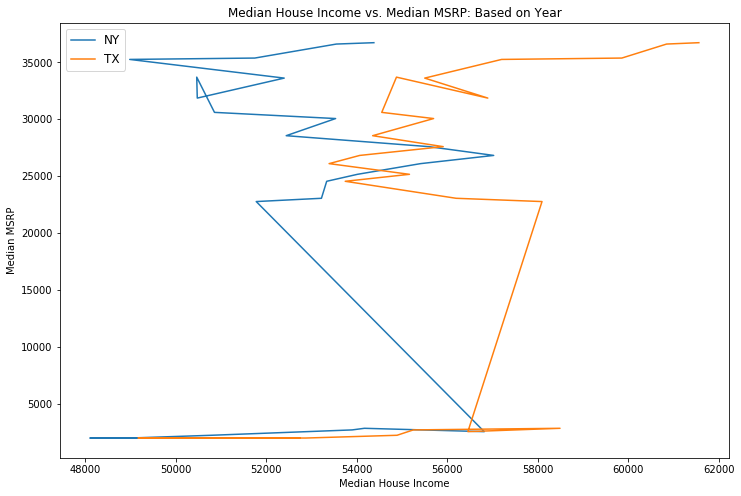

In [235]:
#line plot of the data in order by year
#change by year is more easily visible 
x6 = Q5T4['Median_NY']
x7 = Q5T4['Median_TX']
y8 = Q5T4['Median_MSRP']

plt.plot(x6, y8)
plt.plot(x7, y8)

plt.legend(['NY', 'TX'], loc='upper left')
plt.xlabel("Median House Income")
plt.ylabel("Median MSRP")
plt.title("Median House Income vs. Median MSRP: Based on Year")

plt.show()

In [236]:
#OLS Regression Chart for correlation between Median Income for NY vs. Median MSRP
X5a = Q5T4['Median_NY']
Y5a = Q5T4['Median_MSRP']
X5a = sm.add_constant(X5a)
dataQ5a = sm.OLS(Y5a, X5a)
resultsQ5a = dataQ5a.fit()
print(resultsQ5a.summary())

                            OLS Regression Results                            
Dep. Variable:            Median_MSRP   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.364
Date:                Tue, 14 Jan 2020   Prob (F-statistic):             0.0781
Time:                        23:59:16   Log-Likelihood:                -305.33
No. Observations:                  28   AIC:                             614.7
Df Residuals:                      26   BIC:                             617.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.836e+04   5.32e+04     -1.474      0.1

In [237]:
#OLS Regression Chart for correlation between Median Income for TX vs. Median MSRP
X5b = Q5T4['Median_TX']
Y5b = Q5T4['Median_MSRP']
X5b = sm.add_constant(X5b)
dataQ5b = sm.OLS(Y5b, X5b)
resultsQ5b = dataQ5b.fit()
print(resultsQ5b.summary())

                            OLS Regression Results                            
Dep. Variable:            Median_MSRP   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     15.59
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           0.000535
Time:                        23:59:16   Log-Likelihood:                -300.45
No. Observations:                  28   AIC:                             604.9
Df Residuals:                      26   BIC:                             607.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.359e+05   3.93e+04     -3.458      0.0

## QUESTION 5:
 #### --NY income vs MSRP: The R-squared value for the NY data is .115 meaning that 11.5% of Median MSRP values can be predicted by Median in NY incomes for that respective year.  The p-value is .078 which is greater than .05 so it is not statistically significant. 
 #### --TX income vs MSRP: The R-squared value for the TX data is .375 meaning that 37.5% of Median MSRP values can be predicted by Median in TX incomes for that respective year.  The p-value is .001 which is less than .05 so it is statistically significant.  The p-value explains that a 2.81 increase in Median Income in TX due to a one unit increase in MSRP is .1%.  We are assuming there is no relationship between the two variables.  The confidence interval is (1.349, 4.280).  Therefore we can be 95% confident that the coefficient will fall between those two values. 

#### -----------------------------------------------------------


## Question 6 Code Below:

In [238]:
#QUESTION 6
#narrow the data from car details dataframe
Q6T1 = data2new[['Year','Market Category','Engine HP']]
Q6T1.Year = pd.to_datetime(Q6T1['Year'], format='%Y', errors='ignore')
Q6T1

,Year,Market Category,Engine HP
0,2011-01-01,"Factory Tuner,Luxury,High-Performance",335.0
1,2011-01-01,"Luxury,Performance",300.0
2,2011-01-01,"Luxury,High-Performance",300.0
3,2011-01-01,"Luxury,Performance",230.0
4,2011-01-01,Luxury,230.0
...,...,...,...
11194,2012-01-01,"Crossover,Hatchback,Luxury",300.0
11195,2012-01-01,"Crossover,Hatchback,Luxury",300.0
11196,2012-01-01,"Crossover,Hatchback,Luxury",300.0
11197,2013-01-01,"Crossover,Hatchback,Luxury",300.0


In [239]:
#create pivot table based on the year and market category with engine HP in the cross-section
Q6T2 = pd.pivot_table(Q6T1, index=['Year'], values=['Engine HP'],columns=['Market Category'],aggfunc='mean')
Q6T2

Engine HP                   \
Market Category   Crossover Crossover,Diesel   
Year                                           
1990-01-01              NaN              NaN   
1991-01-01              NaN              NaN   
1992-01-01              NaN              NaN   
1993-01-01              NaN              NaN   
1994-01-01              NaN              NaN   
1995-01-01              NaN              NaN   
1996-01-01              NaN              NaN   
1997-01-01              NaN              NaN   
1998-01-01              NaN              NaN   
1999-01-01              NaN              NaN   
2000-01-01              NaN              NaN   
2001-01-01              NaN              NaN   
2002-01-01              NaN              NaN   
2003-01-01       185.000000              NaN   
2004-01-01       190.000000              NaN   
2005-01-01       194.533333              NaN   
2006-01-01       219.000000              NaN   
2007-01-01       238.461538              NaN   
2008-01-01       246.321429              NaN   
2009-01-01       218.849057            221.0   
2010-01-01       201.722222              NaN   
2011-01-01       197.054054              NaN   
2012-01-01       210.782609              NaN   
2013-01-01       179.928571              NaN   
2014-01-01       192.875000              NaN   
2015-01-01       218.082645            240.0   
2016-01-01       213.735714            240.0   
2017-01-01       215.075314              NaN   

                                                          \
Market Category Crossover,Exotic,Luxury,High-Performance   
Year                                                       
1990-01-01                                           NaN   
1991-01-01                                           NaN   
1992-01-01                                           NaN   
1993-01-01                                           NaN   
1994-01-01                                           NaN   
1995-01-01                                           NaN   
1996-01-01                                           NaN   
1997-01-01                                           NaN   
1998-01-01                                           NaN   
1999-01-01                                           NaN   
2000-01-01                                           NaN   
2001-01-01                                           NaN   
2002-01-01                                           NaN   
2003-01-01                                           NaN   
2004-01-01                                           NaN   
2005-01-01                                           NaN   
2006-01-01                                           NaN   
2007-01-01                                           NaN   
2008-01-01                                           NaN   
2009-01-01                                           NaN   
2010-01-01                                           NaN   
2011-01-01                                           NaN   
2012-01-01                                           NaN   
2013-01-01                                           NaN   
2014-01-01                                           NaN   
2015-01-01                                           NaN   
2016-01-01                                           NaN   
2017-01-01                                         424.0   

                                                     \
Market Category Crossover,Exotic,Luxury,Performance   
Year                                                  
1990-01-01                                      NaN   
1991-01-01                                      NaN   
1992-01-01                                      NaN   
1993-01-01                                      NaN   
1994-01-01                                      NaN   
1995-01-01                                      NaN   
1996-01-01                                      NaN   
1997-01-01                                      NaN   
1998-01-01                                      NaN   
1999-01-

In [240]:
#checking index
Q6T2.index

DatetimeIndex(['1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

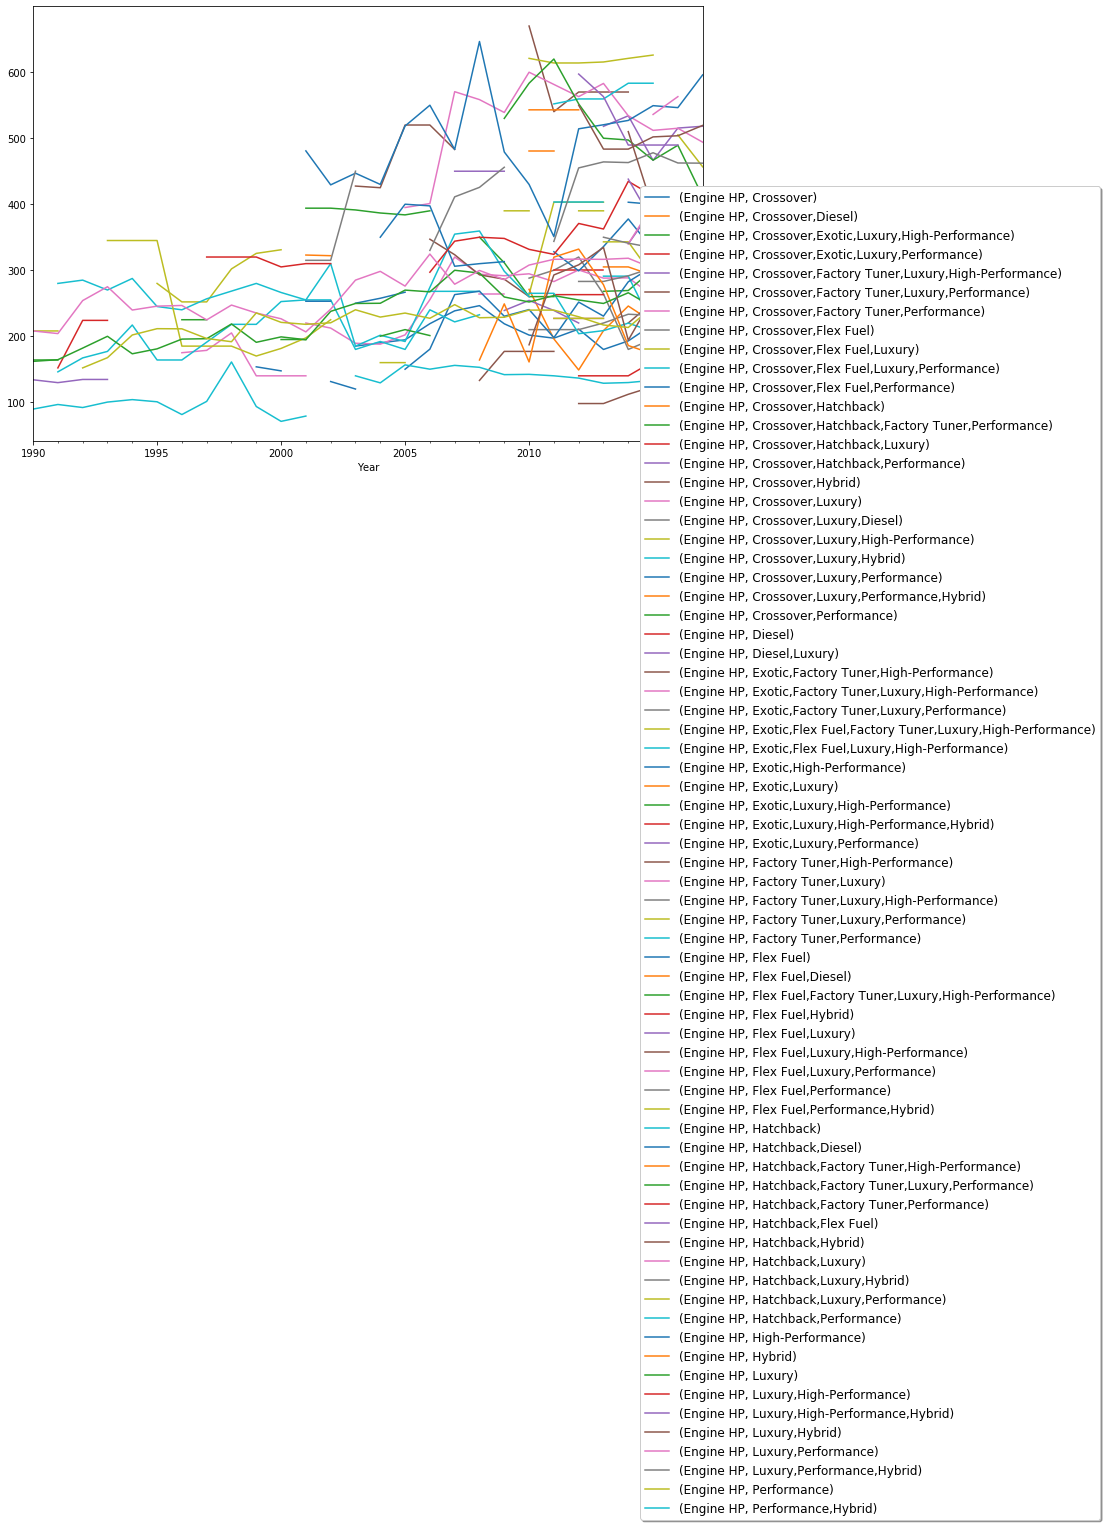

In [241]:
#visualize the data through line plot
from pandas import read_csv
from matplotlib import pyplot
Q6T2.plot()
plt.rcParams['figure.figsize'] = [30, 10]
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.6), shadow=True, ncol=1)
pyplot.show()

In [242]:
#pivot table with year as index
Q6T3 = data2new[['Year','Market Category','Engine HP']]
Q6T3 = pd.pivot_table(Q6T3, index=['Year'], values=['Engine HP'],columns=['Market Category'],aggfunc='mean')
Q6T3

Engine HP                   \
Market Category   Crossover Crossover,Diesel   
Year                                           
1990                    NaN              NaN   
1991                    NaN              NaN   
1992                    NaN              NaN   
1993                    NaN              NaN   
1994                    NaN              NaN   
1995                    NaN              NaN   
1996                    NaN              NaN   
1997                    NaN              NaN   
1998                    NaN              NaN   
1999                    NaN              NaN   
2000                    NaN              NaN   
2001                    NaN              NaN   
2002                    NaN              NaN   
2003             185.000000              NaN   
2004             190.000000              NaN   
2005             194.533333              NaN   
2006             219.000000              NaN   
2007             238.461538              NaN   
2008             246.321429              NaN   
2009             218.849057            221.0   
2010             201.722222              NaN   
2011             197.054054              NaN   
2012             210.782609              NaN   
2013             179.928571              NaN   
2014             192.875000              NaN   
2015             218.082645            240.0   
2016             213.735714            240.0   
2017             215.075314              NaN   

                                                          \
Market Category Crossover,Exotic,Luxury,High-Performance   
Year                                                       
1990                                                 NaN   
1991                                                 NaN   
1992                                                 NaN   
1993                                                 NaN   
1994                                                 NaN   
1995                                                 NaN   
1996                                                 NaN   
1997                                                 NaN   
1998                                                 NaN   
1999                                                 NaN   
2000                                                 NaN   
2001                                                 NaN   
2002                                                 NaN   
2003                                                 NaN   
2004                                                 NaN   
2005                                                 NaN   
2006                                                 NaN   
2007                                                 NaN   
2008                                                 NaN   
2009                                                 NaN   
2010                                                 NaN   
2011                                                 NaN   
2012                                                 NaN   
2013                                                 NaN   
2014                                                 NaN   
2015                                                 NaN   
2016                                                 NaN   
2017                                               424.0   

                                                     \
Market Category Crossover,Exotic,Luxury,Performance   
Year                                                  
1990                                            NaN   
1991                                            NaN   
1992                                            NaN   
1993                                            NaN   
1994                                            NaN   
1995                                            NaN   
1996                                            NaN   
1997                                            NaN   
1998                                            NaN   
1999    

In [243]:
#additonal blank rows to be added
listOfSeries = [pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=Q6T2.columns ),
               pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=Q6T2.columns ),
               pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=Q6T2.columns ),
               pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=Q6T2.columns ),
               pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=Q6T2.columns )]

In [244]:
#added additional columns to input the data
Q6T4 = Q6T3.append(listOfSeries , ignore_index=False)
Q6T4

Engine HP                   \
Market Category   Crossover Crossover,Diesel   
1990                    NaN              NaN   
1991                    NaN              NaN   
1992                    NaN              NaN   
1993                    NaN              NaN   
1994                    NaN              NaN   
1995                    NaN              NaN   
1996                    NaN              NaN   
1997                    NaN              NaN   
1998                    NaN              NaN   
1999                    NaN              NaN   
2000                    NaN              NaN   
2001                    NaN              NaN   
2002                    NaN              NaN   
2003             185.000000              NaN   
2004             190.000000              NaN   
2005             194.533333              NaN   
2006             219.000000              NaN   
2007             238.461538              NaN   
2008             246.321429              NaN   
2009             218.849057            221.0   
2010             201.722222              NaN   
2011             197.054054              NaN   
2012             210.782609              NaN   
2013             179.928571              NaN   
2014             192.875000              NaN   
2015             218.082645            240.0   
2016             213.735714            240.0   
2017             215.075314              NaN   
0                  0.000000              0.0   
1                  0.000000              0.0   
2                  0.000000              0.0   
3                  0.000000              0.0   
4                  0.000000              0.0   

                                                          \
Market Category Crossover,Exotic,Luxury,High-Performance   
1990                                                 NaN   
1991                                                 NaN   
1992                                                 NaN   
1993                                                 NaN   
1994                                                 NaN   
1995                                                 NaN   
1996                                                 NaN   
1997                                                 NaN   
1998                                                 NaN   
1999                                                 NaN   
2000                                                 NaN   
2001                                                 NaN   
2002                                                 NaN   
2003                                                 NaN   
2004                                                 NaN   
2005                                                 NaN   
2006                                                 NaN   
2007                                                 NaN   
2008                                                 NaN   
2009                                                 NaN   
2010                                                 NaN   
2011                                                 NaN   
2012                                                 NaN   
2013                                                 NaN   
2014                                                 NaN   
2015                                                 NaN   
2016                                                 NaN   
2017                                               424.0   
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   

                                                     \
Market Category Crossover,Exotic,Luxury,Performance   
1990                                            NaN   
1991                                            NaN   
1992            

## QUESTION 6:
 #### I completed question 6 in excel; however, with more time, I would've liked to learn to forecast the data and check the accuracy of the forecast in the excel model with a regression analysis using python and time series coding as well with logic similar to this pseudo code:
for each unique market category:<br>
.....for each year 1991-2017:<br>
..........df_mins = find min of each year, create df of mins<br>
..........df_maxes = find max of each year, create df of maxes<br>
..........df_means = find mean of each year, create df of means<br>
..........run regression on each of the newly created dfuse results to predict 2018-2022 for min, max, mean for this event category<br>
.....df_results_event_category = predictions from regression results for each year<br>
.....continue to next event category

#### -----------------------------------------------------------
